In [1]:
# check whether we connected to GPU or not
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [2]:
!ls

datalab


In [2]:
!wget http://www.eecs.berkeley.edu/Research/Projects/CS/vision/grouping/BSR/BSR_bsds500.tgz
!ls
!uncompress BSR_bsds500.tgz
!tar -xvf BSR_bsds500.tar
#!rm BSR_bsds500.tar
!ls

--2018-05-17 19:09:46--  http://www.eecs.berkeley.edu/Research/Projects/CS/vision/grouping/BSR/BSR_bsds500.tgz
Resolving www.eecs.berkeley.edu (www.eecs.berkeley.edu)... 23.185.0.1, 2620:12a:8001::1, 2620:12a:8000::1
Connecting to www.eecs.berkeley.edu (www.eecs.berkeley.edu)|23.185.0.1|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www2.eecs.berkeley.edu/Research/Projects/CS/vision/grouping/BSR/BSR_bsds500.tgz [following]
--2018-05-17 19:09:46--  https://www2.eecs.berkeley.edu/Research/Projects/CS/vision/grouping/BSR/BSR_bsds500.tgz
Resolving www2.eecs.berkeley.edu (www2.eecs.berkeley.edu)... 128.32.244.183
Connecting to www2.eecs.berkeley.edu (www2.eecs.berkeley.edu)|128.32.244.183|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70763455 (67M) [application/x-tar]
Saving to: ‘BSR_bsds500.tgz’

BSR_bsds500.tgz     100%[===================>]  67.48M  19.8MB/s    in 4.3s    

2018-05-17 19:09:51 (15.9 MB/s) - ‘B

BSR/BSDS500/data/images/train/216053.jpg
BSR/BSDS500/data/images/train/35091.jpg
BSR/BSDS500/data/images/train/126039.jpg
BSR/BSDS500/data/images/train/216041.jpg
BSR/BSDS500/data/images/train/187071.jpg
BSR/BSDS500/data/images/train/76002.jpg
BSR/BSDS500/data/images/train/42044.jpg
BSR/BSDS500/data/images/train/65010.jpg
BSR/BSDS500/data/images/train/65019.jpg
BSR/BSDS500/data/images/val/
BSR/BSDS500/data/images/val/295087.jpg
BSR/BSDS500/data/images/val/351093.jpg
BSR/BSDS500/data/images/val/167083.jpg
BSR/BSDS500/data/images/val/236037.jpg
BSR/BSDS500/data/images/val/119082.jpg
BSR/BSDS500/data/images/val/210088.jpg
BSR/BSDS500/data/images/val/299086.jpg
BSR/BSDS500/data/images/val/105025.jpg
BSR/BSDS500/data/images/val/58060.jpg
BSR/BSDS500/data/images/val/45096.jpg
BSR/BSDS500/data/images/val/54082.jpg
BSR/BSDS500/data/images/val/163085.jpg
BSR/BSDS500/data/images/val/189080.jpg
BSR/BSDS500/data/images/val/302008.jpg
BSR/BSDS500/data/images/val/55073.jpg
BSR/BSDS500/data/images/va

In [4]:
!ls

BSR  BSR_bsds500.tar  datalab


In [6]:
import numpy as np
from os import listdir
from os.path import isfile, join

# get all the images files and boundary file
img_dir = "BSR/BSDS500/data/images/train/"
boundary_dir = "BSR/BSDS500/data/groundTruth/train/"
img_files = [f for f in listdir(img_dir) if isfile(join(img_dir, f)) and f.endswith(".jpg")]
boundary_files = [f for f in listdir(boundary_dir) if isfile(join(boundary_dir, f)) and f.endswith(".mat")]

num = len(boundary_files)

print("image files")
sorted_img_files=sorted(img_files)
print(sorted_img_files)
print(len(img_files))
print("boundary files")
sorted_boundary_files=sorted(boundary_files)
print(sorted_boundary_files)
print(len(boundary_files))

image files
['100075.jpg', '100080.jpg', '100098.jpg', '103041.jpg', '104022.jpg', '105019.jpg', '105053.jpg', '106020.jpg', '106025.jpg', '108041.jpg', '108073.jpg', '109034.jpg', '112082.jpg', '113009.jpg', '113016.jpg', '113044.jpg', '117054.jpg', '118020.jpg', '118035.jpg', '12003.jpg', '12074.jpg', '122048.jpg', '124084.jpg', '126039.jpg', '130034.jpg', '134008.jpg', '134052.jpg', '135037.jpg', '135069.jpg', '138032.jpg', '138078.jpg', '140055.jpg', '140075.jpg', '144067.jpg', '145014.jpg', '145053.jpg', '147021.jpg', '147062.jpg', '15004.jpg', '15088.jpg', '151087.jpg', '153077.jpg', '153093.jpg', '155060.jpg', '156079.jpg', '157036.jpg', '159029.jpg', '159045.jpg', '159091.jpg', '16052.jpg', '161062.jpg', '163014.jpg', '163062.jpg', '164074.jpg', '166081.jpg', '169012.jpg', '170054.jpg', '172032.jpg', '173036.jpg', '176019.jpg', '176035.jpg', '176039.jpg', '178054.jpg', '181018.jpg', '181079.jpg', '181091.jpg', '183055.jpg', '183087.jpg', '187003.jpg', '187029.jpg', '187039.jpg'

Getting data from mat files:

In [0]:
'''
import scipy.io
import numpy as np


def get_GT_images(sorted_boundary_files):
  images=[]
  
  for i in range(len(sorted_boundary_files)):
    gTs_per_image=[]
    for path in sorted_boundary_files:
      path="BSR/BSDS500/data/groundTruth/train/"+path
      mat = scipy.io.loadmat(path)
      groundTruth = mat.get('groundTruth')
      label_num = groundTruth.size
      print(label_num)
      for M in range(label_num):
        segmentation = groundTruth[0][M]['Segmentation'][0][0]
        gTs_per_image.append(segmentation)
      
    images.append(gTs_per_image)    
    return images
'''

In [0]:
import scipy.io
import numpy as np
def get_GT_images(sorted_boundary_files):
  images={}
  
  i=0

  for path in sorted_boundary_files:
    gTs_per_image={}
    path="BSR/BSDS500/data/groundTruth/train/"+path
    mat = scipy.io.loadmat(path)
    groundTruth = mat.get('groundTruth')
    label_num = groundTruth.size
    for M in range(label_num):
      segmentation = groundTruth[0][M]['Segmentation'][0][0]
      gTs_per_image[M]=segmentation
    images[i]=gTs_per_image
    i+=1
  return images

In [0]:
import scipy.io
import numpy as np
def get_GT_images_boundary(sorted_boundary_files):
  images={}
  
  i=0

  for path in sorted_boundary_files:
    gTs_per_image={}
    path="BSR/BSDS500/data/groundTruth/train/"+path
    mat = scipy.io.loadmat(path)
    groundTruth = mat.get('groundTruth')
    label_num = groundTruth.size
    for M in range(label_num):
      segmentation = groundTruth[0][M]['Boundaries'][0][0]
      gTs_per_image[M]=segmentation
    images[i]=gTs_per_image
    i+=1
  return images

In [64]:
images=get_GT_images(sorted_boundary_files)
boundaries=get_GT_images_boundary(sorted_boundary_files)
print(len(images[0]))

6


# Visualization


100075.mat


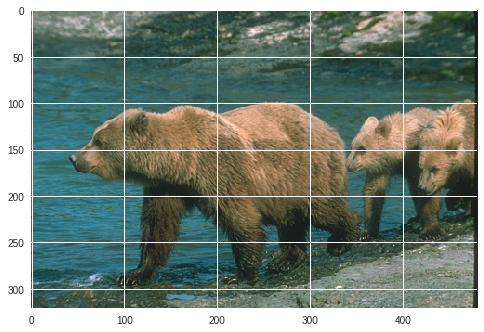

In [69]:
import matplotlib.pyplot as plt
import matplotlib.image as img
print(sorted_boundary_files[0])
x=img.imread("BSR/BSDS500/data/images/train/"+sorted_img_files[0])
plt.imshow(x)

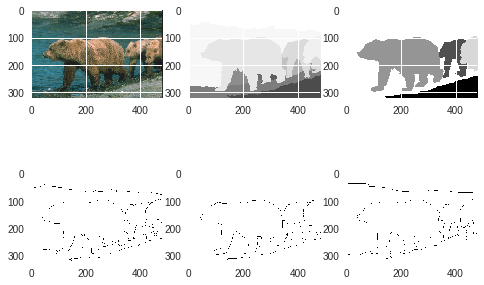

In [70]:
import matplotlib.pyplot as plt
import matplotlib.image as img
import matplotlib.pyplot as plt
#plt.imshow(images[0][2])
#plt.imshow(images[0][1])
print(sorted_boundary_files[0])
x=img.imread("BSR/BSDS500/data/images/train/"+sorted_img_files[0])
plt.imshow(x)

f, axarr = plt.subplots(2,3)
print("photo and color segments:")
axarr[0,0].imshow(x)
axarr[0,1].imshow(images[0][0])
axarr[0,2].imshow(images[0][1])

print("boundaries of clusters:")
axarr[1,0].imshow(boundaries[0][0])
axarr[1,1].imshow(boundaries[0][1])
axarr[1,2].imshow(boundaries[0][2])


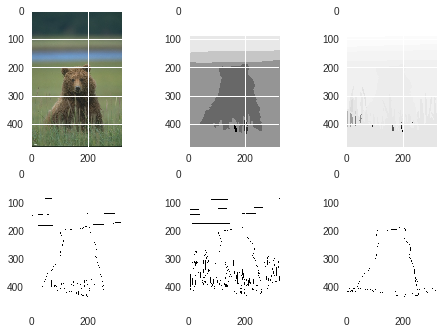

In [71]:

x=img.imread("BSR/BSDS500/data/images/train/"+sorted_img_files[1])


f, axarr = plt.subplots(2,3)
print("photo and color segments:")
axarr[0,0].imshow(x)
axarr[0,1].imshow(images[1][0])
axarr[0,2].imshow(images[1][1])

print("boundaries:")
axarr[1,0].imshow(boundaries[1][0])
axarr[1,1].imshow(boundaries[1][1])
axarr[1,2].imshow(boundaries[1][2])



In [0]:
'''
import scipy.io
import numpy as np


def get_groundTruth(path):
    """
    return the nparray of boundary (0 for boundary and 255 for area)
    :param path:
    :return:
    """
    mat = scipy.io.loadmat(path)
    groundTruth = mat.get('groundTruth')
    label_num = groundTruth.size
    #print(groundTruth.size)
    for i in range(label_num):
        boundary = groundTruth[0][i]['Boundaries'][0][0]
        if i == 0:
            trueBoundary = boundary
        else:
            trueBoundary += boundary

    height = trueBoundary.shape[0]
    width = trueBoundary.shape[1]
    trueBoundary = trueBoundary.reshape(height, width, 1)
    #make a black image and make white every non white color in it ?
    trueBoundary = 255 * np.ones([height, width, 1], dtype="uint8") - (trueBoundary > 0) * 255 # what does this line do?
    

    return trueBoundary


#get_groundTruth('BSR/BSDS500/data/groundTruth/train/2092.mat')
'''

In [17]:
import scipy.io
import numpy as np

mat = scipy.io.loadmat("BSR/BSDS500/data/groundTruth/train/2092.mat")

for x in mat.keys():
  print(x)
  


__header__
__version__
__globals__
groundTruth
(1, 7)


understanding data:

In [19]:
#print(mat['groundTruth'])

[[array([[(array([[ 1,  1,  1, ...,  1,  1,  1],
       [ 1,  1,  1, ...,  1,  1,  1],
       [ 1,  1,  1, ...,  1,  1,  1],
       ...,
       [15, 15, 15, ..., 15, 15, 15],
       [15, 15, 15, ..., 15, 15, 15],
       [15, 15, 15, ..., 15, 15, 15]], dtype=uint16), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8))]],
      dtype=[('Segmentation', 'O'), ('Boundaries', 'O')])
  array([[(array([[ 1,  1,  1, ...,  1,  1,  1],
       [ 1,  1,  1, ...,  1,  1,  1],
       [ 1,  1,  1, ...,  1,  1,  1],
       ...,
       [10, 10, 10, ..., 10, 10, 10],
       [10, 10, 10, ..., 10, 10, 10],
       [10, 10, 10, ..., 10, 10, 10]], dtype=uint16), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 

In [0]:
 from PIL import Image
import numpy as np
import matplotlib
from google.colab import files
data=groundTruth[0][1]['Boundaries'][0][0]
for i in range(data.shape[0]):
  for j in range(data.shape[1]):
    if data[i][j]==10:
      data[i][j]=1
  print(data[0][0])
matplotlib.image.imsave('name.png', data)
files.download('name.png')

In [0]:
for i in range(len(boundary_files)):
  

In [0]:
from PIL import Image
import numpy as np
import matplotlib
from google.colab import files

print("shape")
groundTruth = mat.get('groundTruth')
print(groundTruth.shape)
label_num = groundTruth.size
print(label_num)
for i in range(label_num):
  print(str(i))
  print(groundTruth[0][i].shape)
  print(groundTruth[0][i])
  print(groundTruth[0][i][0].shape)
  print(groundTruth[0][i][0][0].shape)
  print(groundTruth[0][i][0][0])
  print(groundTruth[0][i]['Boundaries'][0][0].shape)
  print(groundTruth[0][i]['Boundaries'][0][0])
  data=(groundTruth[0][i]['Segmentation'][0][0])
  matplotlib.image.imsave(str(i)+'name.png', data)
  files.download(str(i)+'name.png')
from skimage import color
skimage.color.label2rgb(label, image=None, colors=None, alpha=0.3, bg_label=-1, bg_color=(0, 0, 0), image_alpha=1, kind='overlay')

In [11]:
get_groundTruth('BSR/BSDS500/data/groundTruth/train/2092.mat').shape

(321, 481, 1)

In [10]:
# all_comb=[]
# for z in get_groundTruth('BSR/BSDS500/data/groundTruth/train/2092.mat'):
#   all_comb.append(z)
# print(len(all_comb))

print(get_groundTruth('BSR/BSDS500/data/groundTruth/train/2092.mat')[0][:][:][:])

(481, 1)


In [0]:
from PIL import Image
import numpy as np

import matplotlib



#w, h = 512, 512
data = get_groundTruth('BSR/BSDS500/data/groundTruth/train/388016.mat')[0][:][:][:]
#data[256, 256] = [255, 0, 0]
#img = Image.fromarray(data,'RGB')
#img.save('my.png')
matplotlib.image.imsave('name.png', data)

In [0]:
from google.colab import files
files.download('name.png')

In [0]:
'''
import scipy.io as sio

def return_matrix(names):
  matrix=[]
  for name in names:
    mat_contents = sio.loadmat(name+'.mat')
    matrix.append(mat_contents)
    
    
# Can find the the codes below useful?

'''

In [8]:
!ls -l

total 4
drwxr-xr-x 1 root root 4096 May 11 18:15 datalab


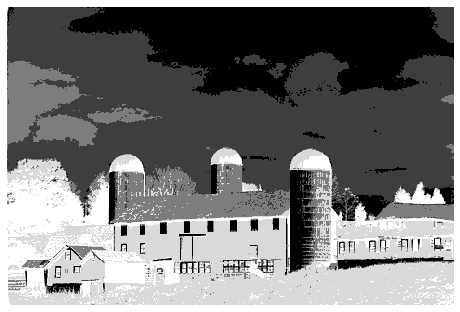

In [14]:
# from sklearn.neighbors import KNeighborsClassifier
# import matplotlib.image as img
# ################################## TEST ######################################
# directory='BSR/BSDS500/data/images/train/97017.jpg'
# #directory = direction + str(i) + ''
# image = img.imread(directory).T

from sklearn.metrics import f1_score



import numpy as np
from matplotlib import pyplot as plt

import cv2

imgs=[]
imgs_clust_grey=[]
imgs.append(cv2.imread('BSR/BSDS500/data/images/train/97017.jpg'))
#imgs.append(cv2.imread('BSR/BSDS500/data/images/train/145053.jpg'))

def images_to_seg(imgs,K):
#img = cv2.imread('BSR/BSDS500/data/images/train/97017.jpg')
  imgs_gray=[]
  for img in imgs:
    Z = img.reshape((-1,3))

    # convert to np.float32
    Z = np.float32(Z)

    # define criteria, number of clusters(K) and apply kmeans()
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    #K = 8
    ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
    #print(label)

    # Now convert back into uint8, and make original image
    center = np.uint8(center)
    res = center[label.flatten()]
    res2 = res.reshape((img.shape))
   
    from skimage.color import rgb2gray
    img_gray = rgb2gray(res2)
    
    
    #print("NP UNIQUE",np.unique(img_gray))
    plt.imshow(img_gray)
    plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
    plt.show()
    imgs_gray.append(img_gray)
  return imgs_gray
    
imgs_clust_gre=images_to_seg(imgs,5)





In [32]:

import scipy.io
import numpy as np
mat = scipy.io.loadmat("BSR/BSDS500/data/groundTruth/train/97017.mat")
groundTruth = mat.get('groundTruth')
seg = groundTruth[0][0]['Segmentation'][0][0]
#matplotlib.image.imsave('name.png', seg)
#files.download('namae.png')

test=imgs_clust_grey[0]
print(np.unique(test))
purity=[]
recall=[]
Fi=[]
for i in range(len(np.unique(test))):
  q=(np.where((test==np.unique(test)[i])))
  s=[seg[i,j] for i,j in zip(q[0],q[1])]
  unique_elements, counts_elements = np.unique(s, return_counts=True)
  purity.append(np.amax(counts_elements)/len(s))
  unique_elements1, counts_elements1 = np.unique(seg, return_counts=True)
  index=np.where(unique_elements1==unique_elements[np.argmax(counts_elements)])
  #print(index[0][0])
  #print(counts_elements1)
  recall.append(np.amax(counts_elements)/counts_elements1[index[0][0]])
for j,k in zip(purity,recall):
  Fi.append(2*j*k/(j+k))
F_total=np.sum(Fi)/len(Fi)
print("f-measure:",F_total)

print(purity)
print(recall)
#print(str(np.argmax(np.bincount(s))))




# for i in range(len(np.unique(test))):
#   q=(np.where((test==np.unique(test)[i])))
#   s=[seg[i,j] for i,j in zip(q[0],q[1])]
#   unique_elements, counts_elements = np.unique(s, return_counts=True)


[0.14067137 0.32205451 0.57332275 0.73145647 0.87686706]
f-measure: 0.4763862822894683
[0.4445977645922451, 0.39053000061413745, 0.3456356487549148, 0.9419098746218546, 0.8479359052736575]
[0.6206298757584513, 0.8972134038800705, 0.07594047317376582, 0.6204358543159253, 0.30354304406920224]


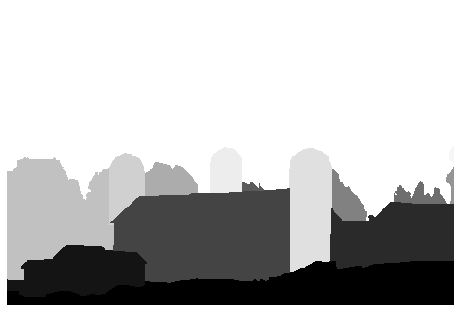

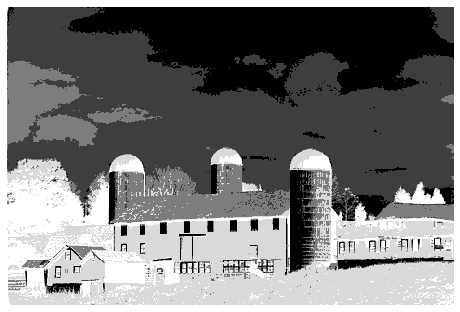

14494
32566
19075
57187
31079
333956.7899463779
354009.42039184144
totaal=== 0.0017694450364267613
totaal=== 0.079044016212165
totaal=== 0.22429097072655607
totaal=== 0.34825556499501786
totaal=== 0.8681803730116138
totaal=== 0.8707134637412116
totaal=== 0.9313413359048264
totaal=== 1.1033474554629428
totaal=== 1.11645803926879
totaal=== 1.4482096213427944
totaal=== 1.7932290264434123
totaal=== 2.2151616968831687
totaal=== 2.5067430783655045
HCI=== 0.1570391473836542
totaal=== 2.5086882283398135
totaal=== 2.5755001433482168
totaal=== 2.765000309231617
totaal=== 2.839467917757268
totaal=== 3.159805528855166
totaal=== 3.1926135355774594
totaal=== 3.210514604825887
totaal=== 3.2443121674582507
totaal=== 3.27057795303764
totaal=== 3.772037950497209
totaal=== 4.129368232210667
totaal=== 4.403337538607723
totaal=== 4.933089420123581
HCI=== 0.6943736846562062
totaal=== 5.462836908112194
totaal=== 5.474093484992686
totaal=== 5.659679863279781
totaal=== 5.924412631585069
totaal=== 6.13796955511

In [18]:
#conditional entropy

import scipy.io
import numpy as np
mat = scipy.io.loadmat("BSR/BSDS500/data/groundTruth/train/97017.mat")
groundTruth = mat.get('groundTruth')
seg = groundTruth[0][0]['Segmentation'][0][0]
#matplotlib.image.imsave('name.png', seg)
#files.download('namae.png')
plt.imshow(seg)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()
test=imgs_clust_grey[0]
plt.imshow(test)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()


H_C=0
for i in range (len(np.unique(test))):
  x= np.unique(test)
  z=np.where(test==x[i])
  print(len(z[0]))
  C= -1*np.log2(len(z[0])/(len(test)*len(test[1])))*(len(z[0]/(len(test)*len(test[1]))))
  H_C +=C
  
print(H_C) 

H_T=0
for i in range (len(np.unique(seg))):
  x= np.unique(seg)
  z=np.where(seg==x[i])
  C= -1*np.log2(len(z[0])/(len(seg)*len(seg[1])))*(len(z[0]/(len(seg)*len(seg[1]))))
  H_T +=C

print(H_T) 

total=0
HC=0

for i in range(len(np.unique(test))):
  q=(np.where((test==np.unique(test)[i])))
  s=[seg[i,j] for i,j in zip(q[0],q[1])]
  unique_elements, counts_elements = np.unique(s, return_counts=True)
  count=np.sum(counts_elements)
  for i in range (len(counts_elements)):
    C= -1*(counts_elements[i]/(count))*(np.log2(counts_elements[i]/(count)))
    total +=C
    print("totaal=== "+ str(total))
    
  HCi= total*(count/(len(seg[0])*len(seg[1])))
  print("HCI=== "+ str(HCi))
  HC+=HCi
  
#print(HC)  
  

